In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

customerID: A unique identifier for each customer. It’s used to track individual customers.

gender: The gender of the customer (e.g., Male or Female).

SeniorCitizen: Indicates whether the customer is a senior citizen (1 if they are, 0 if they are not).

Partner: Shows if the customer has a partner (Yes or No).

Dependents: Shows if the customer has any dependents (Yes or No).

tenure: The number of months the customer has been with the company.

PhoneService: Indicates whether the customer has phone service (Yes or No).

MultipleLines: Shows if the customer has multiple phone lines (Yes, No, or No phone service).

InternetService: The type of internet service the customer has (e.g., DSL, Fiber optic, or No).

OnlineSecurity: Indicates whether the customer has online security (Yes or No).

OnlineBackup: Indicates whether the customer has online backup (Yes or No).

DeviceProtection: Shows if the customer has device protection (Yes or No).

TechSupport: Indicates whether the customer has tech support (Yes or No).

StreamingTV: Shows if the customer has streaming TV service (Yes or No).

StreamingMovies: Indicates whether the customer has streaming movies service (Yes or No).

Contract: The type of contract the customer has (e.g., Month-to-month, One year, or Two year).

PaperlessBilling: Shows if the customer has opted for paperless billing (Yes or No).

PaymentMethod: The method the customer uses to pay (e.g., Electronic check, Mailed check, Bank transfer, or Credit card).

MonthlyCharges: The amount the customer is billed each month.

TotalCharges: The total amount the customer has been billed since they started the service.

Churn: Indicates whether the customer has left the service (Yes or No).

### Problem Statement:
Need to predict whether the person left the service of the bank or still in that bank.

In [5]:
dataset = pd.read_csv(r"/content/Telco-Customer-Churn.csv")

In [6]:
dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
dataset.shape

(7043, 21)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
dataset.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [12]:
#Finding NAN values
dataset.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [13]:
dataset['TotalCharges'].fillna(0, inplace=True)

In [14]:
dataset.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


### Observation:
If we observe in the columns that the Total charges is object datatype, but it is Float datatype. So need to change it.

In [15]:
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')

In [16]:
dataset.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [17]:
#Numerical columns
numerical_columns = dataset.select_dtypes(include = np.number)
numerical_columns

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [18]:
#Categorical Columns
categorical_columns = dataset.select_dtypes(exclude = np.number)
categorical_columns

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


### Identifying the datatypes.
Discrete data:gender,	Partner, Dependents,	PhoneService,	MultipleLines, InternetService,	OnlineSecurity,	OnlineBackup,	DeviceProtection,	TechSupport,	StreamingTV,	StreamingMovies,	Contract,	PaperlessBilling,	PaymentMethod,	Churn.

Continuous data: Monthly charges, Total charges.

Ordinal Data:tenure, Contract.

In [19]:
# From the CustomerID - dataset won't effect much so, dropping.
dataset = dataset.drop('customerID', axis =1)#axis=1--specifies the column in the dataset.

In [20]:
dataset.shape

(7043, 20)

In [21]:
for col in ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']:
  print(f'{col}: {dataset[col].unique()}')

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


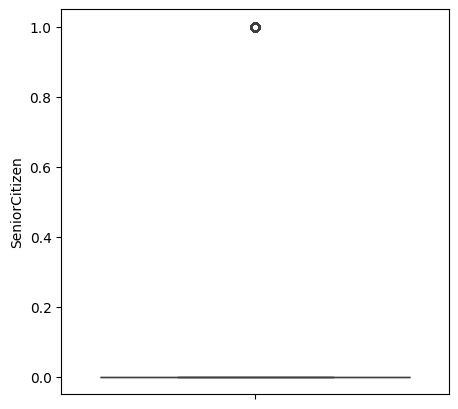

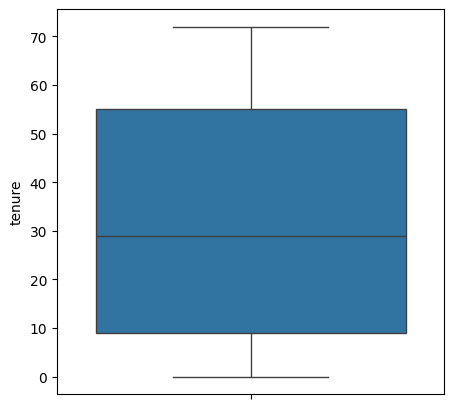

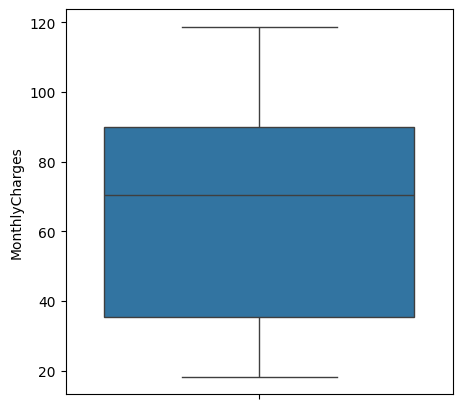

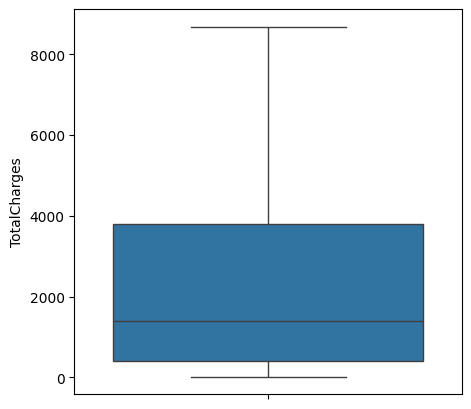

In [22]:
#Handling the Outliers
for col in numerical_columns:
  plt.figure(figsize=(5,5))
  sns.boxplot(dataset[col])
  plt.show()

In [23]:
dataset['MultipleLines']

,MultipleLines
0,No phone service
1,No
2,No
3,No phone service
4,No
...,...
7038,Yes
7039,Yes
7040,No phone service
7041,Yes


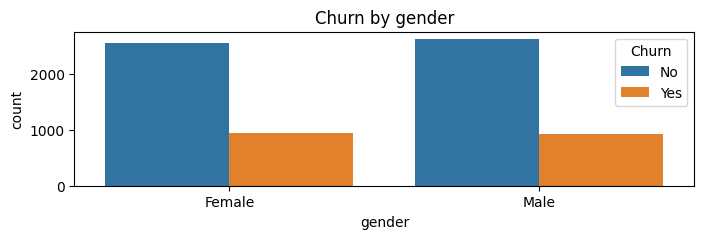

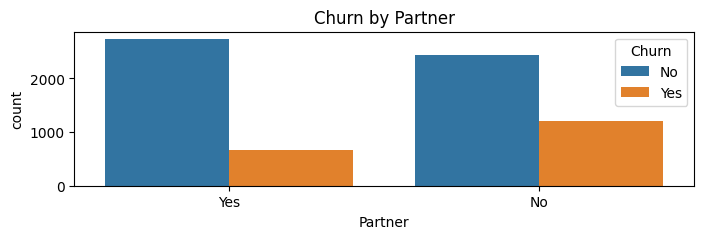

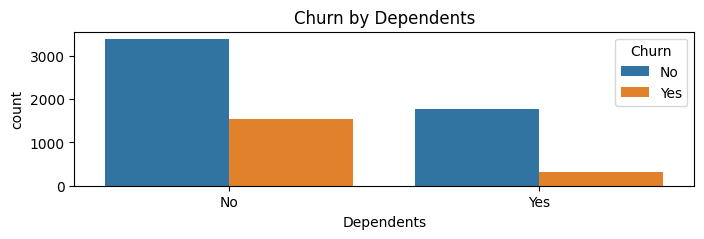

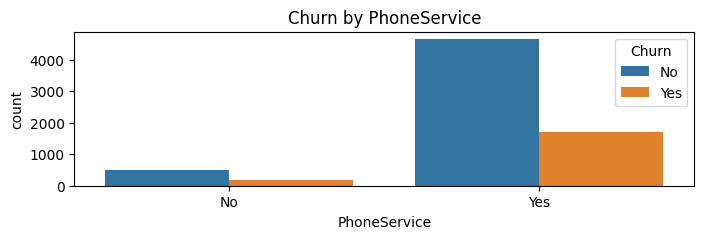

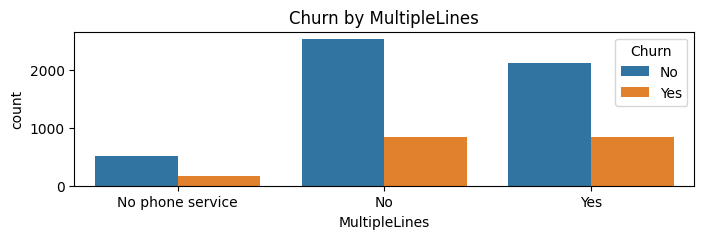

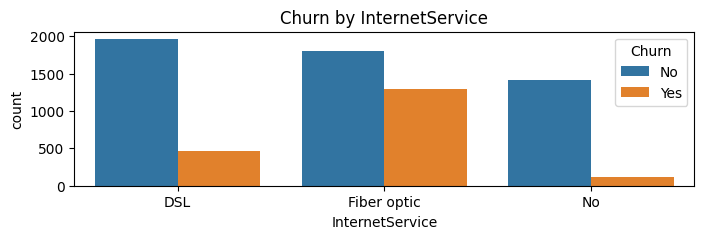

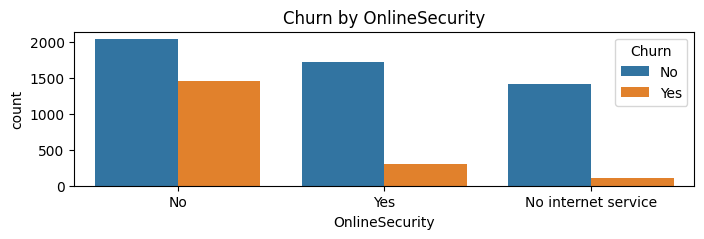

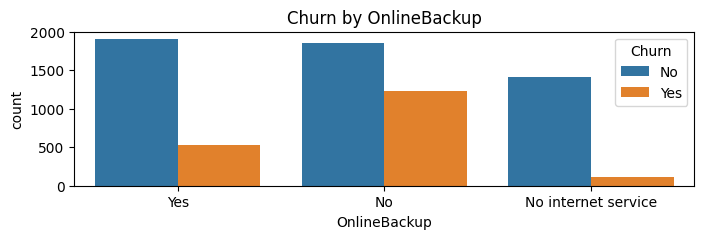

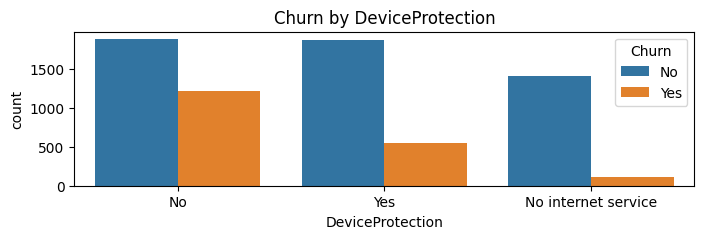

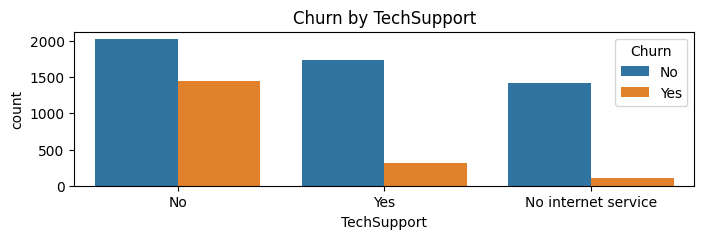

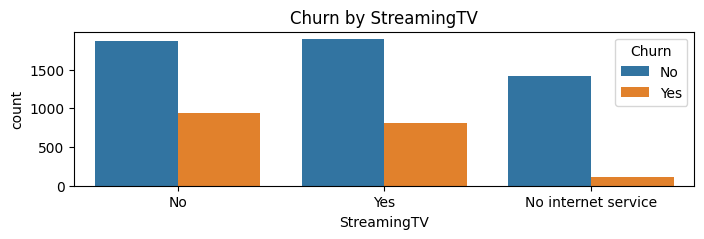

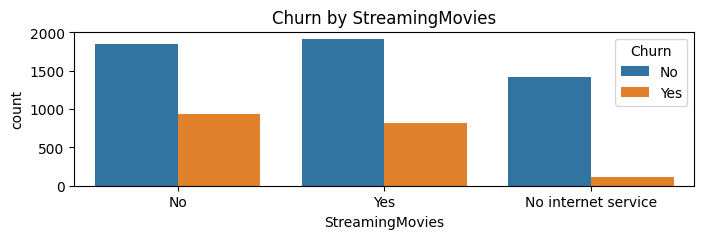

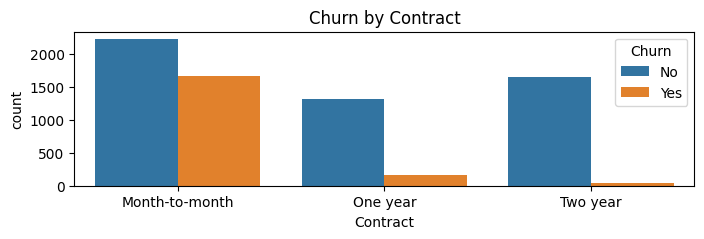

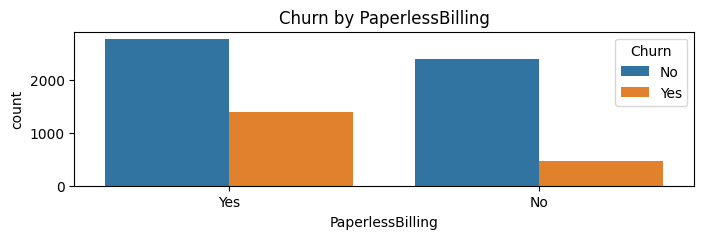

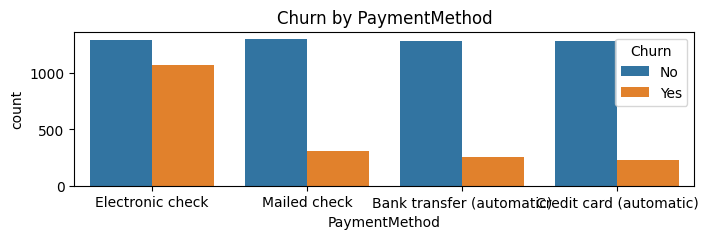

In [24]:
for col in ['gender',	'Partner', 'Dependents',	'PhoneService',	'MultipleLines', 'InternetService',	'OnlineSecurity',	'OnlineBackup',	'DeviceProtection',	'TechSupport',	'StreamingTV',	'StreamingMovies',	'Contract',	'PaperlessBilling',	'PaymentMethod']:

  plt.figure(figsize=(8,2))

  sns.countplot(data = dataset, x = col, hue = 'Churn')
  plt.title(f'Churn by {col}')
  plt.show()

### Observation:
There is outlier in the senior citizen so, need to remove that in the column.

In [25]:
#By using IQR- to remove outlier in the senior citizen col
Q1 = dataset['SeniorCitizen'].quantile(0.25)
Q3 = dataset['SeniorCitizen'].quantile(0.75)
IQR = Q3 - Q1

In [26]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [27]:
dataset = dataset[(dataset['SeniorCitizen'] >= lower_bound) & (dataset['SeniorCitizen'] <= upper_bound)]

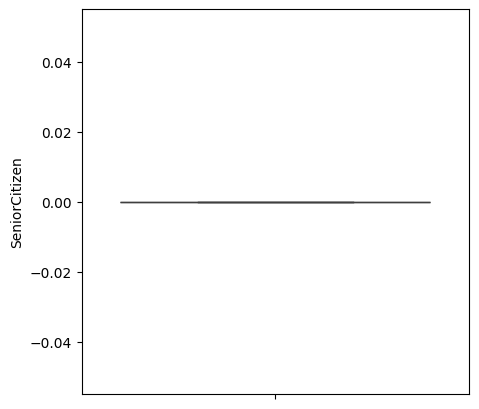

In [28]:
plt.figure(figsize=(5,5))
sns.boxplot(dataset['SeniorCitizen'])
plt.show()

### Observation:
Hence the outlier is removed.

In [29]:

# Binary label encoding
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
               'PaperlessBilling', 'Churn']
for col in binary_cols:
    dataset[col] = dataset[col].map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})

# Ordinal encoding
contract_order = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
dataset['Contract'] = dataset['Contract'].map(contract_order)

# One-hot encode nominal columns with more than 2 categories
one_hot_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                'PaymentMethod']
df = pd.get_dummies(dataset, columns=one_hot_cols)

# Optional: check your data
print(df.head())
#


   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  Contract  \
0       0              0        1           0       1             0         0   
1       1              0        0           0      34             1         1   
2       1              0        0           0       2             1         0   
3       1              0        0           0      45             0         1   
4       0              0        0           0       2             1         0   

   PaperlessBilling  MonthlyCharges  TotalCharges  ...  StreamingTV_No  \
0                 1           29.85         29.85  ...            True   
1                 0           56.95       1889.50  ...            True   
2                 1           53.85        108.15  ...            True   
3                 0           42.30       1840.75  ...            True   
4                 1           70.70        151.65  ...            True   

   StreamingTV_No internet service  StreamingTV_Yes  StreamingMovies

In [30]:
df = df.fillna(0).astype(int)

In [31]:
df.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
Contract,int64
PaperlessBilling,int64
MonthlyCharges,int64
TotalCharges,int64


### Splitting the Data into Independent and dependent variables.

In [32]:
X = df.drop('Churn', axis=1)

In [33]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,29,29,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,1,0,56,1889,...,1,0,0,1,0,0,0,0,0,1
2,1,0,0,0,2,1,0,1,53,108,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,1,0,42,1840,...,1,0,0,1,0,0,1,0,0,0
4,0,0,0,0,2,1,0,1,70,151,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,0,0,0,72,1,2,1,21,1419,...,0,1,0,0,1,0,1,0,0,0
7038,1,0,1,1,24,1,1,1,84,1990,...,0,0,1,0,0,1,0,0,0,1
7039,0,0,1,1,72,1,1,1,103,7362,...,0,0,1,0,0,1,0,1,0,0
7040,0,0,1,1,11,0,0,1,29,346,...,1,0,0,1,0,0,0,0,1,0


In [34]:
y = df['Churn']

In [35]:
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7037,0
7038,0
7039,0
7040,0


#### Splitting the data into train and test data.

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X.shape

(5901, 38)

In [38]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [39]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6518,1,0,0,0,1,1,0,0,45,45,...,1,0,0,1,0,0,0,0,1,0
4135,0,0,1,1,36,1,2,1,92,3379,...,0,0,1,0,0,1,0,1,0,0
2410,0,0,1,0,43,1,0,0,80,3398,...,1,0,0,1,0,0,0,0,1,0
173,0,0,1,0,53,1,1,1,94,5000,...,0,0,1,0,0,1,1,0,0,0
280,0,0,0,0,6,1,0,0,55,322,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,1,0,0,0,24,1,0,0,54,1348,...,1,0,0,1,0,0,0,0,1,0
4650,0,0,1,1,37,1,0,0,26,911,...,0,1,0,0,1,0,0,0,0,1
1702,0,0,1,0,21,1,0,1,104,2200,...,0,0,1,0,0,1,1,0,0,0
5202,1,0,1,1,59,1,2,1,111,6555,...,0,0,1,0,0,1,0,0,0,1


In [40]:
X_train.shape

(4720, 38)

In [41]:
X_test.shape

(1181, 38)

In [42]:
y_train

,Churn
6518,1
4135,0
2410,0
173,1
280,0
...,...
1918,0
4650,0
1702,1
5202,0


In [43]:
y_train.shape

(4720,)

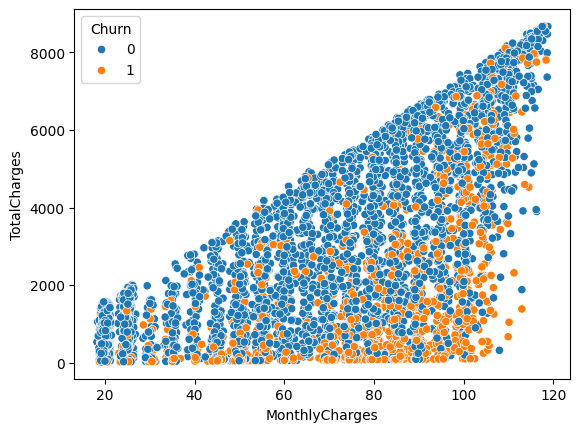

In [44]:
#Identifying which are going to churn which are not
sns.scatterplot(x = 'MonthlyCharges', y = 'TotalCharges', data = dataset, hue = 'Churn')
plt.show()

### MinMax Scaler

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
sc = MinMaxScaler()

In [47]:
X_train  = sc.fit_transform(X_train.values)


In [48]:
X_train

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [49]:
X_test = sc.transform(X_test.values)

In [50]:
X_test

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

1. Bi-nary Classification

### Building the model

1. Logistic Regression

In [ ]:
from sklearn.linear_model import SGDClassifier, LogisticRegression

In [ ]:
log_reg = LogisticRegression(max_iter=100)

In [ ]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Logistic model--of training data is ready

### Prediction/Testing

In [ ]:
X_test

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#feeding the new input to the trained model to predictions
y_pred = log_reg.predict(X_test)

In [ ]:
y_pred

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
y_test

,Churn
781,0
1193,0
2634,1
2518,0
1915,0
...,...
5,1
5399,0
3625,0
4814,1


2. KNN Classifier

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
knn_model = KNeighborsClassifier(n_neighbors=9, p=1)

In [85]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9, p=1)

In [86]:
#knn model is build

In [87]:
#Prediction /Testing
X_test

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [88]:
y_pred_knn = knn_model.predict(X_test)

In [89]:
y_pred_knn

array([0, 0, 1, ..., 0, 1, 0])

In [90]:
y_test

,Churn
781,0
1193,0
2634,1
2518,0
1915,0
...,...
5,1
5399,0
3625,0
4814,1


### Evaluation

In [91]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [92]:
acc_score = accuracy_score(y_test, y_pred_knn)

In [93]:
y_test

,Churn
781,0
1193,0
2634,1
2518,0
1915,0
...,...
5,1
5399,0
3625,0
4814,1


In [94]:
y_pred_knn

array([0, 0, 1, ..., 0, 1, 0])

In [95]:
print("test_acc_score = ", acc_score)

test_acc_score =  0.7917019475021169


In [80]:
continuency_table = confusion_matrix(y_test, y_pred_knn)

In [81]:
continuency_table

array([[823,  90],
       [152, 116]])

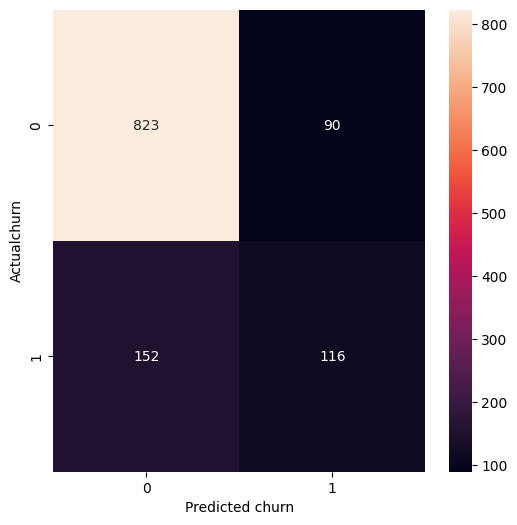

In [82]:
plt.figure(figsize=(6,6))
sns.heatmap(continuency_table, annot=True, fmt='d')
plt.xlabel('Predicted churn')
plt.ylabel('Actualchurn')
plt.show()

### Train Accuracy

In [ ]:
y_pred_train = log_reg.predict(X_train)

In [ ]:
y_pred_train

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
train_acc_score = accuracy_score(y_train, y_pred_train)

In [ ]:
print("train_acc_score=", train_acc_score)

train_acc_score= 0.8180084745762712


In [ ]:
cm_train = confusion_matrix(y_train, y_pred_train)

In [ ]:
print("confusion matrix of the data")
print(cm_train)

confusion matrix of the data
[[3302  293]
 [ 566  559]]


In [ ]:
#mlxtend is used for ploting lot of.
#To install mlxtend go for----!pip install mlxtend
from mlxtend.plotting import plot_confusion_matrix

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

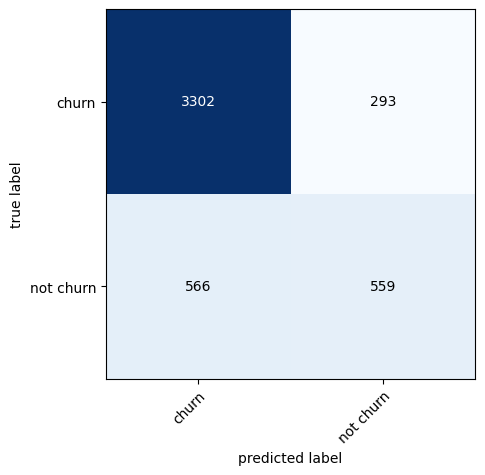

In [ ]:
plot_confusion_matrix(cm_train, class_names=["churn", "not churn"])

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

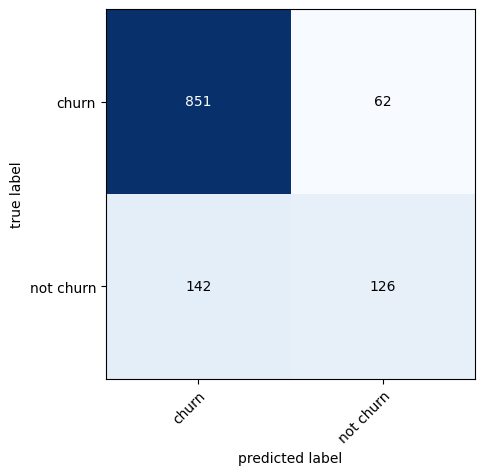

In [ ]:
plot_confusion_matrix(continuency_table, class_names=["churn", "not churn"])

### 2. Multi-class classification.

### Saving the model

In [ ]:
import joblib

In [ ]:
log_reg.scaler = sc

In [ ]:
joblib.dump(log_reg, 'log_reg_model.pkl')

['log_reg_model.pkl']

decision plotD

In [ ]:
from mlxtend.plotting import plot_decision_regions

In [ ]:
y_train = y_train.astype(int)

In [ ]:
X_train_subset = X_train[:, [0, 1]]

### Building the model for Multi-class model.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lor_model = LogisticRegression(multi_class='ovr', max_iter = 200)

In [ ]:
lor_model.fit(X_train, y_train)

LogisticRegression(max_iter=200, multi_class='ovr')

### Prediction

In [ ]:
y_pred = lor_model.predict(X_test)

In [ ]:
y_pred

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       913
           1       0.67      0.47      0.55       268

    accuracy                           0.83      1181
   macro avg       0.76      0.70      0.72      1181
weighted avg       0.81      0.83      0.82      1181



In [ ]:
print(accuracy_score(y_test, y_pred))

0.8272650296359018


In [ ]:
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
cm_test = confusion_matrix(y_test, y_pred)

In [ ]:
cm_test

array([[851,  62],
       [142, 126]])

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

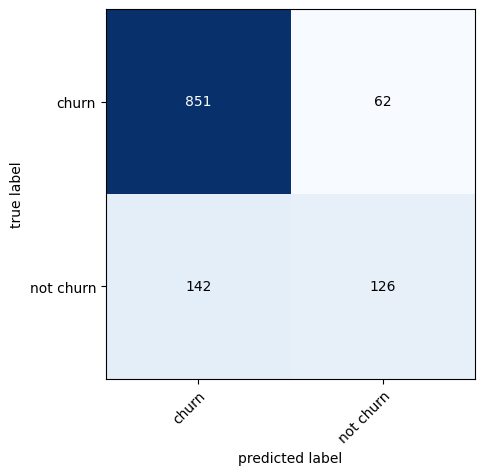

In [ ]:
plot_confusion_matrix(cm_test, class_names=["churn", "not churn"])